In [1]:
import tensorflow as tf
import tensorflow.keras as keras

import numpy as np
print('tensorflow {}'.format(tf.__version__))
print("keras {}".format(keras.__version__))

tensorflow 2.1.0
keras 2.2.4-tf


In [2]:
import matplotlib.pyplot as plt

In [3]:
model = keras.applications.VGG16(weights='imagenet')

In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

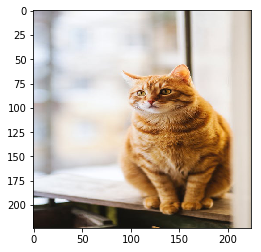

In [5]:
_img = keras.preprocessing.image.load_img('cat_front.jpeg',target_size=(224,224))
plt.imshow(_img)
plt.show()

In [6]:
#preprocess image to get it into the right format for the model
img = keras.preprocessing.image.img_to_array(_img)
img = img.reshape((1, *img.shape))
y_pred = model.predict(img)
class_idxs_sorted = np.argsort(y_pred.flatten())[::-1]
topNclass = 5

In [7]:
layers = [layer.output for layer in model.layers]

In [8]:
images = tf.Variable(img, dtype=float)

with tf.GradientTape() as tape:
    pred = model(images, training=False)
    class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_idxs_sorted[0]]
    
grads = tape.gradient(loss, images)

In [9]:
grads.shape

TensorShape([1, 224, 224, 3])

In [10]:
dgrad_abs = tf.math.abs(grads)

In [11]:
dgrad_max_ = np.max(dgrad_abs, axis=3)[0]

In [12]:
dgrad_max_.shape

(224, 224)

In [13]:
## normalize to range between 0 and 1
arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-6)

In [14]:
grad_eval.shape

(224, 224)

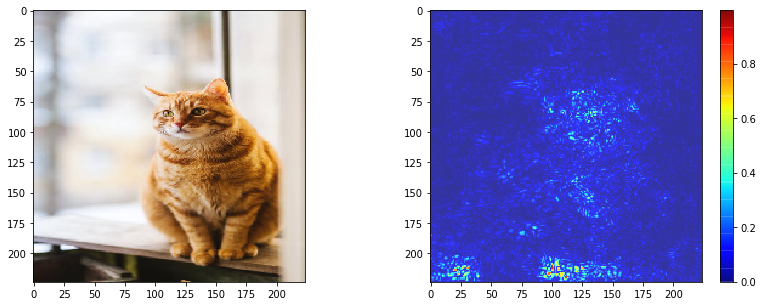

In [15]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(_img)
i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
fig.colorbar(i)